# Mask R-CNN - Test Script/ Inference Script

 

In [1]:
import math
from PIL import Image, ImageDraw
from PIL import ImagePath
import pandas as pd
import os
from os import path
from tqdm import tqdm
import json
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib

from google.colab.patches import cv2_imshow


from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


# Setting Up MaskRcnn Framework using maskrcnn implemented by matterport

src= https://github.com/matterport/Mask_RCNN

In [2]:
%cd '/content/drive/MyDrive/mask_rcnn/Mask_RCNN'
!ls

/content/drive/MyDrive/mask_rcnn/Mask_RCNN
assets	images	 MANIFEST.in	     README.md	       setup.cfg
build	LICENSE  mask_rcnn.egg-info  requirements.txt  setup.py
dist	logs	 mrcnn		     samples


In [3]:
!pip uninstall tensorflow

Found existing installation: tensorflow 2.6.0
Uninstalling tensorflow-2.6.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.7/dist-packages/tensorflow-2.6.0.dist-info/*
    /usr/local/lib/python3.7/dist-packages/tensorflow/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-2.6.0


In [4]:

!pip uninstall keras

Found existing installation: keras 2.6.0
Uninstalling keras-2.6.0:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/keras-2.6.0.dist-info/*
    /usr/local/lib/python3.7/dist-packages/keras/*
Proceed (y/n)? y
  Successfully uninstalled keras-2.6.0


In [ ]:
!pwd

/content/drive/MyDrive/mask_rcnn/Mask_RCNN


In [5]:
!pip install -q PyDrive
!pip install -r requirements.txt
!python setup.py install

     |████████████████████████████████| 345.0 MB 3.8 kB/s 
     |████████████████████████████████| 312 kB 36.3 MB/s 
     |████████████████████████████████| 2.9 MB 31.7 MB/s 
     |████████████████████████████████| 3.2 MB 36.3 MB/s 
     |████████████████████████████████| 50 kB 6.2 MB/s 
     |████████████████████████████████| 367 kB 32.8 MB/s 
     |████████████████████████████████| 154 kB 43.8 MB/s 
     |████████████████████████████████| 199 kB 47.2 MB/s 
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.6.0
    Uninstalling tensorflow-estimator-2.6.0:
      Successfully uninstalled tensorflow-estimator-2.6.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.6.0
    Uninstalling tensorboard-2.6.0:
      Successfully uninstalled tensorboard-2.6.0
/usr/local/li

In [6]:
import tensorflow as tf
print(tf.__version__)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

1.13.1


In [7]:
!ls

assets	images	 MANIFEST.in	     README.md	       setup.cfg
build	LICENSE  mask_rcnn.egg-info  requirements.txt  setup.py
dist	logs	 mrcnn		     samples


In [8]:
import keras
print(keras.__version__)

2.2.3


Using TensorFlow backend.


In [9]:
from mrcnn.config import Config
from mrcnn import model as modellib
from mrcnn import visualize
import mrcnn
from mrcnn.utils import Dataset
from mrcnn.model import MaskRCNN
import numpy as np
from numpy import zeros
from numpy import asarray
import colorsys
import argparse
import imutils
import random
import cv2
import os
import time
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from keras.models import load_model
%matplotlib inline
from os import listdir
from xml.etree import ElementTree

# config file for training

In [10]:


class myMaskRCNNConfig(Config):
    # give the configuration a recognizable name
    NAME = "MaskRCNN_config"
 
    # set the number of GPUs to use along with the number of images
    # per GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
 
    # number of classes (we would normally add +1 for the background)
     # kangaroo + BG
    NUM_CLASSES = 1+1
   
    # Number of training steps per epoch
    STEPS_PER_EPOCH = 101
    
    # Learning rate
    LEARNING_RATE=0.001
    
    # Skip detections with < 90% confidence
    DETECTION_MIN_CONFIDENCE = 0.95
    
    # setting Max ground truth instances
    MAX_GT_INSTANCES=100

config=myMaskRCNNConfig()

In [11]:
!ls

assets	images	 MANIFEST.in	     README.md	       setup.cfg
build	LICENSE  mask_rcnn.egg-info  requirements.txt  setup.py
dist	logs	 mrcnn		     samples


# Defining test confiig

In [12]:
class InferenceConfig(config.__class__):
    # Run detection on one image at a time
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    '''
    # Number of ROIs per image to feed to classifier/mask heads
    # The Mask RCNN paper uses 512 but often the RPN doesn't generate
    # enough positive proposals to fill this and keep a positive:negative
    # ratio of 1:3. You can increase the number of proposals by adjusting
    # the RPN NMS threshold.
    TRAIN_ROIS_PER_IMAGE =200

    # How many anchors per image to use for RPN training
    RPN_TRAIN_ANCHORS_PER_IMAGE=256
    
    MASK_POOL_SIZE =14
    MASK_SHAPE=[28, 28]
    MAX_GT_INSTANCES=100
    MINI_MASK_SHAPE=(56,56)

    '''
config = InferenceConfig()
config.display()



Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.95
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE        

In [13]:
model_ = modellib.MaskRCNN(mode="inference", model_dir='./',
                              config=config)
#print(model.keras_model.summary())

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


# loading pre trained   weight file for testing our license plate detector

In [14]:
!ls '../'

character_recognition.h5		  m1.h5		     mask_rcnn_data
data					  Mask_RCNN	     test_images
m1_epoch_9_loss1.6_1630737493.3999991.h5  mask_rcnn_coco.h5  v1.h5


In [15]:
WEIGHTS_PATH = "../v1.h5"

model_.load_weights(WEIGHTS_PATH,by_name=True)

In [16]:
!ls '../'

character_recognition.h5		  m1.h5		     mask_rcnn_data
data					  Mask_RCNN	     test_images
m1_epoch_9_loss1.6_1630737493.3999991.h5  mask_rcnn_coco.h5  v1.h5


(480, 640, 3)


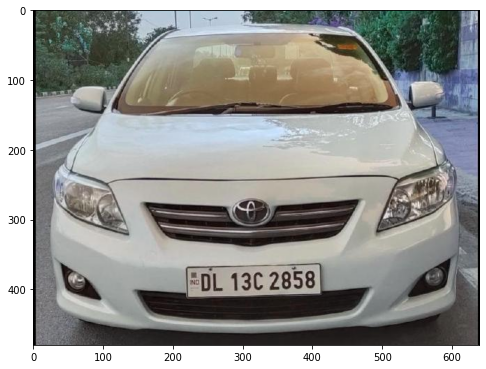

In [ ]:
image=cv2.imread('../test_images/p19.jpg')

print(image.shape)
plt.figure(figsize=(8,8))
plt.imshow(image)

# Passing input img to Mask Rcnn model for inference

In [ ]:
def predict_pipeline(input_img,model_):
  results = model_.detect([image], verbose=1)
  print('hi')
  print(results[0].keys())
  print(results[0]['rois'].shape)
  print('hii')
  #ndarray
  if results[0]['rois'].shape[0]>0:


    # no of paltes found are
    print(results[0]['rois'].shape[0])
    #boudning box coordinate are
    print(results[0]['rois'])
    #confidence probability is
    print(results[0]['scores'])
    #predicted class id us 
    print(results[0]['class_ids'])

    # prediction img
    pred_plate=getpred(list(results[0]['rois']))

    
    plt.figure(figsize=(10,6))
    
    plt.subplot(131)
    plt.title('Input img ')
    plt.imshow(image)


    plt.subplot(132)
    mask_=np.uint8(results[0]['masks'][:,:,0])
    masked = cv2.bitwise_and(input_img, input_img, mask=mask_)
    plt.title("predicted mask")
    plt.imshow(masked)
    
    

    plt.subplot(133)
    plt.imshow(pred_plate[0])
    plt.title('predicted plate')

    plt.show()



In [ ]:
!ls '../test_images'

img_20.jpg     p11.jpg	p15.jpg  p18.jpg  p4.jpg  p7.jpg
no_plate.jpeg  p12.jpg	p16.png  p19.jpg  p5.jpg  p8.jpg
p10.jpg        p13.jpg	p17.jpg  p3.jpg   p6.png  p9.jpg


In [ ]:
src='../test_images'

In [ ]:
for i in os.listdir(src):
  print('image path is == ',i)
  input_image=cv2.imread(src+'/'+i)
  print(input_image.shape)

image path is ==  img_20.jpg
(744, 720, 3)
image path is ==  no_plate.jpeg
(265, 500, 3)
image path is ==  p3.jpg
(177, 250, 3)
image path is ==  p4.jpg
(570, 870, 3)
image path is ==  p5.jpg
(500, 500, 3)
image path is ==  p6.png
(472, 592, 3)
image path is ==  p7.jpg
(338, 600, 3)
image path is ==  p8.jpg
(1042, 1563, 3)
image path is ==  p9.jpg
(747, 776, 3)
image path is ==  p10.jpg
(1067, 1600, 3)
image path is ==  p11.jpg
(1223, 2572, 3)
image path is ==  p12.jpg
(493, 740, 3)
image path is ==  p13.jpg
(768, 1024, 3)
image path is ==  p15.jpg
(480, 640, 3)
image path is ==  p16.png
(340, 766, 3)
image path is ==  p17.jpg
(269, 360, 3)
image path is ==  p19.jpg
(480, 640, 3)
image path is ==  p18.jpg
(480, 640, 3)


In [ ]:
!ls '../test_images'

img_20.jpg     p11.jpg	p15.jpg  p18.jpg  p4.jpg  p7.jpg
no_plate.jpeg  p12.jpg	p16.png  p19.jpg  p5.jpg  p8.jpg
p10.jpg        p13.jpg	p17.jpg  p3.jpg   p6.png  p9.jpg


In [26]:
def getpred(boxes,image):

  print('input image shape is == ',image.shape)
  preds=[]
  for i in range(len(boxes)):
    box = boxes[i]
    col_s, col_e = box[1], box[3]
    row_s, row_e = box[0], box[2]
    pred_mask=image[row_s:row_e, col_s:col_e]
    print('predicted mask shape is == ',pred_mask.shape)
    preds.append(pred_mask) 
  return preds

# Segmenting Character from EXTRACTED plate

In [ ]:
import numpy as np
import cv2

# Match contours to license plate or character template
def find_contours(dimensions, img) :
    #ii=img.copy()

    # Find all contours in the image
    cntrs, _ = cv2.findContours(img.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Retrieve potential dimensions
    lower_width = dimensions[0]
    upper_width = dimensions[1]
    lower_height = dimensions[2]
    upper_height = dimensions[3]
    print('*'*20)
    print('log before contour detection ')
    #dimensions = [LP_WIDTH/6, LP_WIDTH/2, LP_HEIGHT/10, 2*LP_HEIGHT/3]
    #dimensions = [5, LP_HEIGHT/10, 0.5*LP_WIDTH, .8*LP_WIDTH]

    print(img.shape)
    print()
    print('width of license plate is == ',img.shape[0])
    print('lower_width (lp_width/6) = ',lower_width)
    print('upper_width (lp_width/2)  == ',upper_width)
    
    print()
    print('HEIGHT of license plate is == ',img.shape[1])
    print('lower height (lp_height/10) == ',lower_height)
    print('upper_height lp_height*.66 == ',upper_height)
    print('*'*20)
    # Check largest 5 or  15 contours for license plate or character respectively
    cntrs = sorted(cntrs, key=cv2.contourArea, reverse=True)[:15]
    
    #ii = cv2.imread('../p3.jpg')
    ii=img.copy()
    print('ii intitalized')
    cv2_imshow(ii)

    x_cntr_list = []
    target_contours = []
    img_res = []
    cnt=0
    for i,cntr in enumerate(cntrs) :
        #detects contour in binary image and returns the coordinates of rectangle enclosing it
        intX, intY, intWidth, intHeight = cv2.boundingRect(cntr)
        print('#'*40)
        print('contour stats are')
        print('intx is == ',intX)
        print('inty is == ',intY)
        print('contour width is == ',intWidth)
        print('contour height is == ',intHeight)
        print('#'*20)
        print('*'*40)
        print('lower_width (lp_width/6) = ',lower_width)
        print('width of char contour is == ',intWidth)
        print('upper_width (lp_width/2)  == ',upper_width)
        print()
        print('lower height (lp_height/10) == ',lower_height)
        print('height of char contour is == ',intHeight)

        print('upper_height lp_height*.66 == ',upper_height)
        print('*'*20)
        
        #checking the dimensions of the contour to filter out the characters by contour's size
        if intWidth > lower_width and intWidth < upper_width and intHeight > lower_height and intHeight < upper_height :
            cnt+=1   
            print('[*]'*20)
            print('character dtected')
            print('[*]'*20)

            x_cntr_list.append(intX) #stores the x coordinate of the character's contour, to used later for indexing the contours

            char_copy = np.zeros((44,24))
            #extracting each character using the enclosing rectangle's coordinates.
            char = img[intY:intY+intHeight, intX:intX+intWidth]
            char = cv2.resize(char, (20, 40))
            print('char extracted')
            cv2_imshow(char)
            
            cv2.rectangle(ii, (intX,intY), (intWidth+intX, intY+intHeight), (50,21,200), 2)
            print('contour extracted')
            cv2_imshow(ii)

            plt.title('contours')
            plt.imshow(ii, cmap='gray')

#             Make result formatted for classification: invert colors
            char = cv2.subtract(255, char)

            # Resize the image to 24x44 with black border
            char_copy[2:42, 2:22] = char
            char_copy[0:2, :] = 0
            char_copy[:, 0:2] = 0
            char_copy[42:44, :] = 0
            char_copy[:, 22:24] = 0
            if cnt>10:
              break
            img_res.append(char_copy) #List that stores the character's binary image (unsorted)
            
    #Return characters on ascending order with respect to the x-coordinate (most-left character first)
            
    plt.show()
    #arbitrary function that stores sorted list of character indeces
    indices = sorted(range(len(x_cntr_list[:10])), key=lambda k: x_cntr_list[k])
    img_res_copy = []
    for idx in indices:
        img_res_copy.append(img_res[idx])# stores character images according to their index
    img_res = np.array(img_res_copy)

    return img_res,ii

## Methodology for character extraction using contours idea used from pyimage search open cv blogs


In [29]:
# technique for extraction idea used from pyimage search open cv blogs
from google.colab.patches import cv2_imshow

# Find characters in the resulting images
def segment_characters(image) :


    plt.figure(figsize=(6,18))
    plt.title('orignal image')
    plt.imshow(image)
    # Preprocess cropped license plate image
    img = cv2.resize(image, (333, 75))
    print('resize to 333,75')
    plt.figure(figsize=(6,18))
    plt.title('resize to 333,75')

    plt.imshow(img)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    print('grayscale img')
    plt.figure(figsize=(6,18))
    plt.title('grayscale img')
    plt.imshow(img_gray)
    
    _, img_binary = cv2.threshold(img_gray, 200, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    print("binary/thresholding")
    plt.figure(figsize=(6,18))
    plt.title('thresholding')
    
    plt.imshow(img_binary)
    img_erode = cv2.erode(img_binary, (3,3))
    
    plt.figure(figsize=(6,18))
    plt.title('erosion')
    plt.imshow(img_erode)
    print('before dilation')
    cv2_imshow(img_erode)
    img_dilate = cv2.dilate(img_erode, (3,3))

    LP_WIDTH = img_dilate.shape[0]
    LP_HEIGHT = img_dilate.shape[1]

    print('after dilation')
    cv2_imshow(img_dilate)

    # Make borders white
    img_dilate[0:5,:] = 255
    img_dilate[:,0:5] = 255
    img_dilate[72:75,:] = 255
    img_dilate[:,330:333] = 255
    print('after dilation iwth white border')
    cv2_imshow(img_dilate)
    plt.figure(figsize=(6,18))
    plt.title('dilation')

    plt.imshow(img_dilate)

    # Estimations of character contours sizes of cropped license plates
    #dimensions = [LP_WIDTH/6, LP_WIDTH/2, LP_HEIGHT/10, 2*LP_HEIGHT/3]
    dimensions = [5, LP_HEIGHT/9, 0.27*LP_WIDTH, .8*LP_WIDTH]

    # Get contours within cropped license plate
    char_list,ii = find_contours(dimensions, img_dilate)
    print('no of characters found are = ',len(char_list))
    return char_list,ii

In [ ]:
def predict_pipeline(input_img,model_):
  results = model_.detect([input_img], verbose=1)
  print('hi')
  print(results[0].keys())
  print(results[0]['rois'].shape)
  print('hii')
  #ndarray
  if results[0]['rois'].shape[0]>0:


    # no of paltes found are
    print(results[0]['rois'].shape[0])
    #boudning box coordinate are
    print(results[0]['rois'])
    #confidence probability is
    print(results[0]['scores'])
    #predicted class id us 
    print(results[0]['class_ids'])
    mask_=np.uint8(results[0]['masks'][:,:,0])
     
    masked = cv2.bitwise_and(input_img, input_img, mask=mask_)

    # prediction imgut__
    pred_plate=getpred(list(results[0]['rois']),input_img)

    
    plt.figure(figsize=(10,6))
    
    plt.subplot(131)
    plt.title('Input img ')
    plt.imshow(input_img)

    
    plt.subplot(132)
    #mask_=np.uint8(results[0]['masks'][:,:,0])
    #masked = cv2.bitwise_and(input_img, input_img, mask=mask_)
    plt.title("predicted mask")
    plt.imshow(masked)
    
    

    plt.subplot(133)
    plt.imshow(pred_plate[0])
    plt.title('predicted plate')

    plt.show()



In [ ]:
'''
from google.colab.patches import cv2_imshow
src='../test_images'


for idx,i in enumerate(os.listdir(src)):
  if idx>1:
    break
  print('image path is == ',i)
  input_image=cv2.imread(src+'/'+i)
  predict_pipeline(input_image,model_)  
  '''

# Loading char cnn model
## model trained for digit recognition in a seperat notebook

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, Dropout, Conv2D
from tensorflow.keras import optimizers

In [18]:
def load_char_cnn():
  model = Sequential()
  model.add(Conv2D(32, (24,24), input_shape=(28, 28, 3), activation='relu', padding='same'))
  # model.add(Conv2D(32, (20,20), input_shape=(28, 28, 3), activation='relu', padding='same'))
  # model.add(Conv2D(32, (20,20), input_shape=(28, 28, 3), activation='relu', padding='same'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.4))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dense(36, activation='softmax'))

  model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(lr=0.00001), metrics=['accuracy'])
  model.summary()
  #loading pretrained weights saved using training char cnn
  model.load_weights('../m1.h5')
  return model


In [19]:
char_model=load_char_cnn()
print(char_model.summary)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        55328     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               802944    
_________________________________________________________________
dense_1 (Dense)              (None, 36)                4644      
Total params: 862,916
Train

In [20]:
def fix_dimension(img): 
  new_img = np.zeros((28,28,3))
  for i in range(3):
    new_img[:,:,i] = img
  return new_img
  

def cnnCharRecognition(img):
    dictionary={}
    '''
    dictionary = {0:'0', 1:'1', 2 :'2', 3:'3', 4:'4', 5:'5', 6:'6', 7:'7', 8:'8', 9:'9', 10:'A',
    11:'B', 12:'C', 13:'D', 14:'E', 15:'F', 16:'G', 17:'H', 18:'I', 19:'J', 20:'K',
    21:'L', 22:'M', 23:'N', 24:'P', 25:'Q', 26:'R', 27:'S', 28:'T', 29:'U',
    30:'V', 31:'W', 32:'X', 33:'Y', 34:'Z'}
    '''
    characters = '0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ'
    for i,c in enumerate(characters):
        dictionary[i] = c

    #blackAndWhiteChar=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blackAndWhiteChar = cv2.resize(img,(28,28))
    blackAndWhiteChar=fix_dimension(blackAndWhiteChar)
    image = blackAndWhiteChar.reshape((1, 28,28, 3))
    image = image / 255.0
    new_predictions = char_model.predict(image)
    char = np.argmax(new_predictions)
    return dictionary[char]
def predict(charlist):
  ans=[]
  for i in range(len(charlist)):
    plt.subplot(1, 12, i+1)
    z=cnnCharRecognition(charlist[i])
    print('pred-{0} is {1}'.format(i,z))
    ans.append(z)
    plt.title('char== {0}'.format( z))

    plt.imshow(charlist[i], cmap='gray')
    plt.axis('off') 
    print('opencv+ yolo == ',''.join(ans))
    return ans
def predict_(charlist):
  ans=[]
  for i in range(len(charlist)):
    #plt.subplot(1, 12, i+1)
    z=cnnCharRecognition(charlist[i])
    #print('pred-{0} is {1}'.format(i,z))
    ans.append(z)
    #plt.title('char== {0}'.format( z))

    #plt.imshow(charlist[i], cmap='gray')
    #plt.axis('off') 
    print('opencv+ yolo == ',''.join(ans))
    return ans

# Predicting on a single test image

(269, 360, 3)


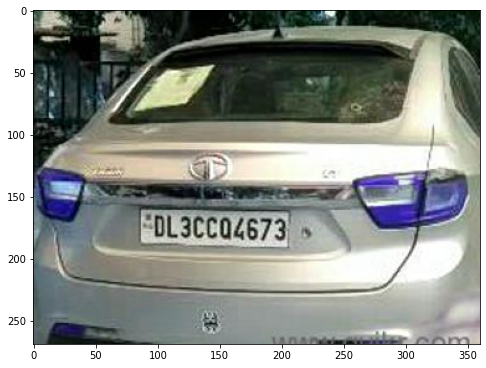

In [ ]:
image=cv2.imread('../test_images/p17.jpg')

print(image.shape)
plt.figure(figsize=(8,8))
plt.imshow(image)

 

In [ ]:
results = model_.detect([image], verbose=1)
# prediction img
pred_plate=getpred(list(results[0]['rois']),image)
 

Processing 1 images
image                    shape: (269, 360, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
input image shape is ==  (269, 360, 3)
predicted mask shape is ==  (44, 164, 3)


In [ ]:
from google.colab.patches import cv2_imshow


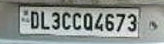

In [ ]:
cv2_imshow(pred_plate[0])

resize to 333,75
grayscale img
binary/thresholding
before dilation


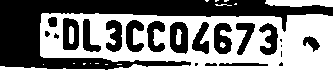

after dilation


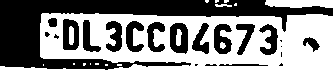

after dilation iwth white border


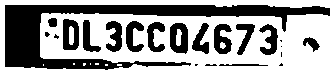

********************
log before contour detection 
(75, 333)

width of license plate is ==  75
lower_width (lp_width/6) =  5
upper_width (lp_width/2)  ==  37.0

HEIGHT of license plate is ==  333
lower height (lp_height/10) ==  20.25
upper_height lp_height*.66 ==  60.0
********************
ii intitalized


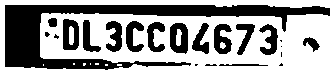

########################################
contour stats are
intx is ==  0
inty is ==  0
contour width is ==  333
contour height is ==  75
####################
****************************************
lower_width (lp_width/6) =  5
width of char contour is ==  333
upper_width (lp_width/2)  ==  37.0

lower height (lp_height/10) ==  20.25
height of char contour is ==  75
upper_height lp_height*.66 ==  60.0
********************
########################################
contour stats are
intx is ==  4
inty is ==  4
contour width is ==  327
contour height is ==  67
####################
****************************************
lower_width (lp_width/6) =  5
width of char contour is ==  327
upper_width (lp_width/2)  ==  37.0

lower height (lp_height/10) ==  20.25
height of char contour is ==  67
upper_height lp_height*.66 ==  60.0
********************
########################################
contour stats are
intx is ==  169
inty is ==  22
contour width is ==  20
contour height is ==  33
#########

contour extracted


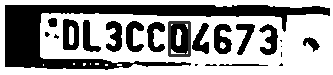

########################################
contour stats are
intx is ==  62
inty is ==  18
contour width is ==  18
contour height is ==  33
####################
****************************************
lower_width (lp_width/6) =  5
width of char contour is ==  18
upper_width (lp_width/2)  ==  37.0

lower height (lp_height/10) ==  20.25
height of char contour is ==  33
upper_height lp_height*.66 ==  60.0
********************
[*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*]
character dtected
[*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*]
char extracted


contour extracted


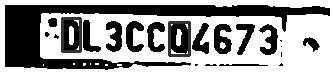

########################################
contour stats are
intx is ==  213
inty is ==  23
contour width is ==  20
contour height is ==  32
####################
****************************************
lower_width (lp_width/6) =  5
width of char contour is ==  20
upper_width (lp_width/2)  ==  37.0

lower height (lp_height/10) ==  20.25
height of char contour is ==  32
upper_height lp_height*.66 ==  60.0
********************
[*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*]
character dtected
[*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*]
char extracted


contour extracted


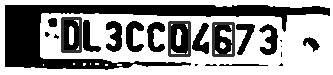

########################################
contour stats are
intx is ==  105
inty is ==  20
contour width is ==  18
contour height is ==  33
####################
****************************************
lower_width (lp_width/6) =  5
width of char contour is ==  18
upper_width (lp_width/2)  ==  37.0

lower height (lp_height/10) ==  20.25
height of char contour is ==  33
upper_height lp_height*.66 ==  60.0
********************
[*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*]
character dtected
[*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*]
char extracted


contour extracted


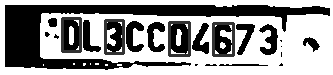

########################################
contour stats are
intx is ==  125
inty is ==  20
contour width is ==  20
contour height is ==  33
####################
****************************************
lower_width (lp_width/6) =  5
width of char contour is ==  20
upper_width (lp_width/2)  ==  37.0

lower height (lp_height/10) ==  20.25
height of char contour is ==  33
upper_height lp_height*.66 ==  60.0
********************
[*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*]
character dtected
[*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*]
char extracted


contour extracted


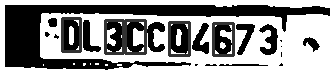

########################################
contour stats are
intx is ==  258
inty is ==  23
contour width is ==  21
contour height is ==  33
####################
****************************************
lower_width (lp_width/6) =  5
width of char contour is ==  21
upper_width (lp_width/2)  ==  37.0

lower height (lp_height/10) ==  20.25
height of char contour is ==  33
upper_height lp_height*.66 ==  60.0
********************
[*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*]
character dtected
[*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*]
char extracted


contour extracted


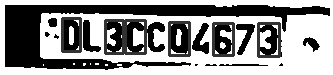

########################################
contour stats are
intx is ==  146
inty is ==  21
contour width is ==  20
contour height is ==  32
####################
****************************************
lower_width (lp_width/6) =  5
width of char contour is ==  20
upper_width (lp_width/2)  ==  37.0

lower height (lp_height/10) ==  20.25
height of char contour is ==  32
upper_height lp_height*.66 ==  60.0
********************
[*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*]
character dtected
[*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*]
char extracted


contour extracted


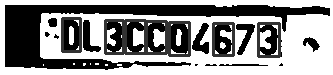

########################################
contour stats are
intx is ==  191
inty is ==  22
contour width is ==  19
contour height is ==  33
####################
****************************************
lower_width (lp_width/6) =  5
width of char contour is ==  19
upper_width (lp_width/2)  ==  37.0

lower height (lp_height/10) ==  20.25
height of char contour is ==  33
upper_height lp_height*.66 ==  60.0
********************
[*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*]
character dtected
[*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*]
char extracted


contour extracted


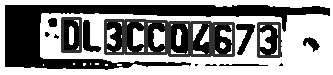

########################################
contour stats are
intx is ==  82
inty is ==  19
contour width is ==  20
contour height is ==  34
####################
****************************************
lower_width (lp_width/6) =  5
width of char contour is ==  20
upper_width (lp_width/2)  ==  37.0

lower height (lp_height/10) ==  20.25
height of char contour is ==  34
upper_height lp_height*.66 ==  60.0
********************
[*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*]
character dtected
[*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*]
char extracted


contour extracted


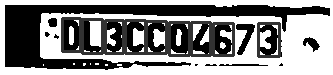

########################################
contour stats are
intx is ==  235
inty is ==  23
contour width is ==  21
contour height is ==  33
####################
****************************************
lower_width (lp_width/6) =  5
width of char contour is ==  21
upper_width (lp_width/2)  ==  37.0

lower height (lp_height/10) ==  20.25
height of char contour is ==  33
upper_height lp_height*.66 ==  60.0
********************
[*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*]
character dtected
[*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*]
char extracted


contour extracted


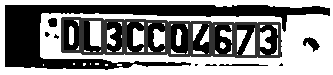

########################################
contour stats are
intx is ==  302
inty is ==  36
contour width is ==  19
contour height is ==  17
####################
****************************************
lower_width (lp_width/6) =  5
width of char contour is ==  19
upper_width (lp_width/2)  ==  37.0

lower height (lp_height/10) ==  20.25
height of char contour is ==  17
upper_height lp_height*.66 ==  60.0
********************
########################################
contour stats are
intx is ==  218
inty is ==  63
contour width is ==  51
contour height is ==  4
####################
****************************************
lower_width (lp_width/6) =  5
width of char contour is ==  51
upper_width (lp_width/2)  ==  37.0

lower height (lp_height/10) ==  20.25
height of char contour is ==  4
upper_height lp_height*.66 ==  60.0
********************
########################################
contour stats are
intx is ==  47
inty is ==  17
contour width is ==  11
contour height is ==  11
##########

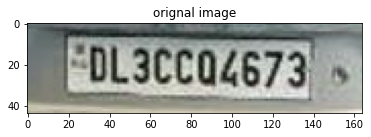

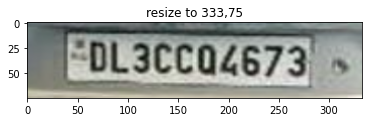

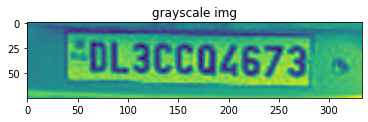

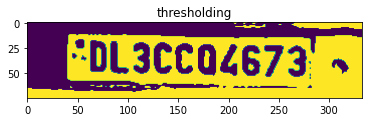

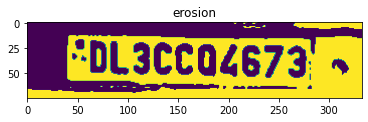

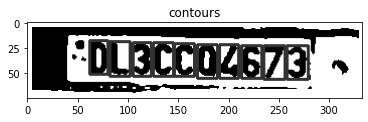

no of characters found are =  10


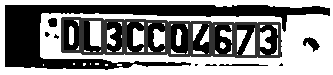

10


In [ ]:
charlist,ii=segment_characters(pred_plate[0])
cv2_imshow(ii)
print(len(charlist))

pred-0 is D
pred-1 is L
pred-2 is 3
pred-3 is C
pred-4 is C
pred-5 is 0
pred-6 is 4
pred-7 is 6
pred-8 is 7
pred-9 is 3
opencv+ yolo ==  DL3CC04673


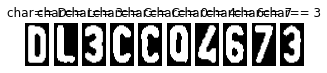

In [ ]:
ans=[]
for i in range(len(charlist)):
    plt.subplot(1, 12, i+1)
    z=cnnCharRecognition(charlist[i])
    print('pred-{0} is {1}'.format(i,z))
    ans.append(z)
    plt.title('char== {0}'.format( z))

    plt.imshow(charlist[i], cmap='gray')
    plt.axis('off')
print('opencv+ yolo == ',''.join(ans))

 

after dilation iwth white border
no of characters found are =  10


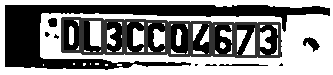

10


In [ ]:
charlist,ii=segment_characters_(pred_plate[0])
cv2_imshow(ii)
print(len(charlist))

In [ ]:
np.array(charlist).shape

(10, 44, 24)

pred-0 is D
pred-1 is L
pred-2 is 3
pred-3 is C
pred-4 is C
pred-5 is 0
pred-6 is 4
pred-7 is 6
pred-8 is 7
pred-9 is 3
opencv+ yolo ==  DL3CC04673


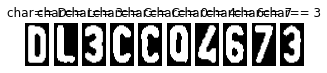

In [ ]:
ans=[]
img_ans=[]
for i in range(len(charlist)):
    plt.subplot(1, 12, i+1)
    z=cnnCharRecognition(charlist[i])
    print('pred-{0} is {1}'.format(i,z))
    ans.append(z)
    
    plt.title('char== {0}'.format( z))

    plt.imshow(charlist[i], cmap='gray')
    plt.axis('off')
print('opencv+ yolo == ',''.join(ans))

 

# Predicting on random 10+ images downloaded from google search

In [21]:
import numpy as np
import cv2

from google.colab.patches import cv2_imshow

# Find characters in the resulting images
def segment_characters_(image) :

    img = cv2.resize(image, (333, 75))
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
   
    
    _, img_binary = cv2.threshold(img_gray, 200, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    
    img_erode = cv2.erode(img_binary, (3,3))
    
    
    
    img_dilate = cv2.dilate(img_erode, (3,3))

    LP_WIDTH = img_dilate.shape[0]
    LP_HEIGHT = img_dilate.shape[1]


    # Make borders white
    img_dilate[0:5,:] = 255
    img_dilate[:,0:5] = 255
    img_dilate[72:75,:] = 255
    img_dilate[:,330:333] = 255
   
    dimensions = [5, LP_HEIGHT/9, 0.27*LP_WIDTH, .8*LP_WIDTH]

    # Get contours within cropped license plate
    char_list,ii = find_contours_(dimensions, img_dilate)
    print('no of characters found are = ',len(char_list))
    return char_list,ii

# Match contours to license plate or character template
def find_contours_(dimensions, img) :

    # Find all contours in the image
    cntrs, _ = cv2.findContours(img.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Retrieve potential dimensions
    lower_width = dimensions[0]
    upper_width = dimensions[1]
    lower_height = dimensions[2]
    upper_height = dimensions[3]
     
    # Check largest 5 or  15 contours for license plate or character respectively
    cntrs = sorted(cntrs, key=cv2.contourArea, reverse=True)[:15]
    
     
    ii=img.copy()
     

    x_cntr_list = []
    target_contours = []
    img_res = []
    cnt=0
    for i,cntr in enumerate(cntrs) :
        #detects contour in binary image and returns the coordinates of rectangle enclosing it
        intX, intY, intWidth, intHeight = cv2.boundingRect(cntr)
         
        
        #checking the dimensions of the contour to filter out the characters by contour's size
        if intWidth > lower_width and intWidth < upper_width and intHeight > lower_height and intHeight < upper_height :
            cnt+=1   
            
            x_cntr_list.append(intX) #stores the x coordinate of the character's contour, to used later for indexing the contours

            char_copy = np.zeros((44,24))
            #extracting each character using the enclosing rectangle's coordinates.
            char = img[intY:intY+intHeight, intX:intX+intWidth]
            char = cv2.resize(char, (20, 40))
            
            
            cv2.rectangle(ii, (intX,intY), (intWidth+intX, intY+intHeight), (50,21,200), 2)
             

             
            #Make result formatted for classification: invert colors
            char = cv2.subtract(255, char)

            # Resize the image to 24x44 with black border
            char_copy[2:42, 2:22] = char
            char_copy[0:2, :] = 0
            char_copy[:, 0:2] = 0
            char_copy[42:44, :] = 0
            char_copy[:, 22:24] = 0
            if cnt>10:
              break
            img_res.append(char_copy) #List that stores the character's binary image (unsorted)
            
    #Return characters on ascending order with respect to the x-coordinate (most-left character first)
  
    #function that stores sorted list of character indeces
    indices = sorted(range(len(x_cntr_list[:10])), key=lambda k: x_cntr_list[k])
    img_res_copy = []
    for idx in indices:
        img_res_copy.append(img_res[idx])# stores character images according to their index
    img_res = np.array(img_res_copy)

    return img_res,ii

In [22]:
def predict_pipeline(input_image,model_):
  
  print('-----'*5)
  results = model_.detect([input_image])
  #print('hi')
  #print(results[0].keys())
  print('roi returned shape is == ',results[0]['rois'].shape)
  #print('hii')
  #ndarray
  if results[0]['rois'].shape[0]>0:
    # prediction img
    pred_plate=getpred(list(results[0]['rois']),input_image)
     

    mask_=np.uint8(results[0]['masks'][:,:,0])
     
    masked = cv2.bitwise_and(input_image, input_image, mask=mask_)
 

    # no of paltes found are
    #print(results[0]['rois'].shape[0])
    #boudning box coordinate are
    #print(results[0]['rois'])
    print('confidence probability is')
    print(results[0]['scores'])
    #predicted class id us 
    #print(results[0]['class_ids'])

    plt.figure(figsize=(10,6))
    
    plt.subplot(141)
    plt.title('Input img ')
    plt.imshow(input_image)


    plt.subplot(142)
     
    plt.title("predicted mask")
    plt.imshow(masked)
    
    

    plt.subplot(143)
    plt.imshow(pred_plate[0])
    plt.title('predicted plate')

    #segmenting characters
    charlist,ii=segment_characters_(pred_plate[0])
 
    plt.subplot(144)
     
    
    plt.title('contours extracted')
    plt.imshow(ii)
    
    number_plate_is=extract_char(charlist)

   
    
  #plt.show()
  print('extracted license plate content is == ',''.join(number_plate_is))
  print('******'*5)


In [23]:
def extract_char(charlist):
  ans=[]
  for i in range(len(charlist)):
    #plt.subplot(1, 12, i+1)
    z=cnnCharRecognition(charlist[i])
    #print('pred-{0} is {1}'.format(i,z))
    ans.append(z)
      
    #plt.title('char== {0}'.format( z))

    #plt.imshow(charlist[i], cmap='gray')
    #plt.axis('off')
  print('opencv+ yolo == ',''.join(ans))
  return ans


In [24]:
def predict_pipeline(input_img,model_):
  print('-------'*5)
  results = model_.detect([input_img], verbose=1)
  print('hi')
  print(results[0].keys())
  print(results[0]['rois'].shape)
  print('hii')
  #ndarray
  if results[0]['rois'].shape[0]>0:


    # no of paltes found are
    print(results[0]['rois'].shape[0])
    #boudning box coordinate are
    print(results[0]['rois'])
    #confidence probability is
    print(results[0]['scores'])
    #predicted class id us 
    print(results[0]['class_ids'])
    mask_=np.uint8(results[0]['masks'][:,:,0])
     
    masked = cv2.bitwise_and(input_img, input_img, mask=mask_)

    # prediction imgut__
    pred_plate=getpred(list(results[0]['rois']),input_img)

    
    plt.figure(figsize=(10,6))
    
    plt.subplot(141)
    plt.title('Input img ')
    plt.imshow(input_img)

    
    plt.subplot(142)
    #mask_=np.uint8(results[0]['masks'][:,:,0])
    #masked = cv2.bitwise_and(input_img, input_img, mask=mask_)
    plt.title("predicted mask")
    plt.imshow(masked)
    
    

    plt.subplot(143)
    plt.imshow(pred_plate[0])
    plt.title('predicted plate')

    
    charlist,ii=segment_characters_(pred_plate[0])
    plt.subplot(144)
     
    
    plt.title('contours extracted')
    plt.imshow(ii)

    plt.show()
    #segmenting characters
    #charlist,ii=segment_characters_(pred_plate[0])
    number_plate_is=extract_char(charlist)

    #print('extracted license plate content is == ',''.join(number_plate_is))
    print('******'*5)



image path is ==  no_plate.jpeg
-----------------------------------
Processing 1 images
image                    shape: (265, 500, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
hi
dict_keys(['rois', 'class_ids', 'scores', 'masks'])
(1, 4)
hii
1
[[ 88   0 182 474]]
[0.97387415]
[1]
input image shape is ==  (265, 500, 3)
predicted mask shape is ==  (94, 474, 3)
no of characters found are =  10


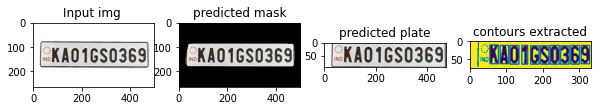

opencv+ yolo ==  KA01GS0369
******************************
image path is ==  p3.jpg
-----------------------------------
Processing 1 images
image                    shape: (177, 250, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
hi
dict_keys(['rois', 'class_ids', 'scores', 'masks'])
(2, 4)
hii
2
[[ 90   4 145 237]
 [ 20   4  73 209]]
[0.99031514 0.97112954]
[1 1]
input image shape is ==  (177, 250, 3)
predicted mask shape is ==  (55, 233, 3)
predicted mask shape is ==  (53, 205, 3)
no of characters found are =  10


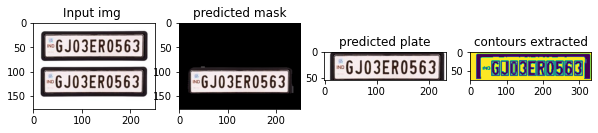

opencv+ yolo ==  GJ03ER0563
******************************
image path is ==  p4.jpg
-----------------------------------
Processing 1 images
image                    shape: (570, 870, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
hi
dict_keys(['rois', 'class_ids', 'scores', 'masks'])
(1, 4)
hii
1
[[255 161 404 715]]
[0.98141646]
[1]
input image shape is ==  (570, 870, 3)
predicted mask shape is ==  (149, 554, 3)
no of characters found are =  10


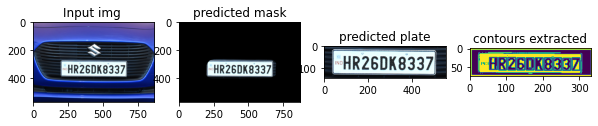

opencv+ yolo ==  HR260K8337
******************************
image path is ==  p5.jpg
-----------------------------------
Processing 1 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
hi
dict_keys(['rois', 'class_ids', 'scores', 'masks'])
(1, 4)
hii
1
[[235 154 290 326]]
[0.98778874]
[1]
input image shape is ==  (500, 500, 3)
predicted mask shape is ==  (55, 172, 3)
no of characters found are =  10


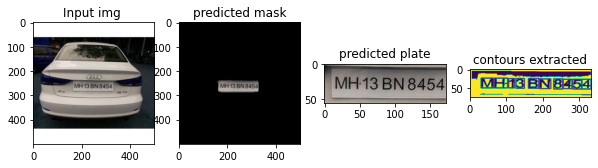

opencv+ yolo ==  M813BN8454
******************************
image path is ==  p6.png
-----------------------------------
Processing 1 images
image                    shape: (472, 592, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
hi
dict_keys(['rois', 'class_ids', 'scores', 'masks'])
(1, 4)
hii
1
[[240 127 331 452]]
[0.9582931]
[1]
input image shape is ==  (472, 592, 3)
predicted mask shape is ==  (91, 325, 3)
no of characters found are =  10


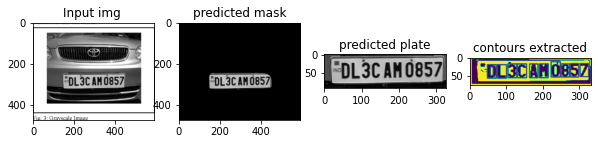

opencv+ yolo ==  0L3CAH0857
******************************
image path is ==  p7.jpg
-----------------------------------
Processing 1 images
image                    shape: (338, 600, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
hi
dict_keys(['rois', 'class_ids', 'scores', 'masks'])
(1, 4)
hii
1
[[216 158 286 418]]
[0.9565472]
[1]
input image shape is ==  (338, 600, 3)
predicted mask shape is ==  (70, 260, 3)
no of characters found are =  10


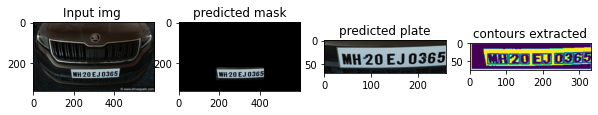

opencv+ yolo ==  WW20EJ0J65
******************************
image path is ==  p8.jpg
-----------------------------------
Processing 1 images
image                    shape: (1042, 1563, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1563.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
hi
dict_keys(['rois', 'class_ids', 'scores', 'masks'])
(1, 4)
hii
1
[[ 359  435  683 1431]]
[0.9694343]
[1]
input image shape is ==  (1042, 1563, 3)
predicted mask shape is ==  (324, 996, 3)
no of characters found are =  10


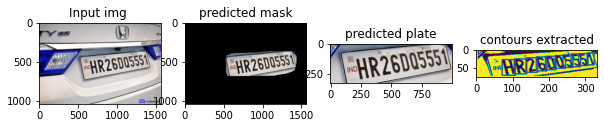

opencv+ yolo ==  WW1S5Q5SSN
******************************
image path is ==  p9.jpg
-----------------------------------
Processing 1 images
image                    shape: (747, 776, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
hi
dict_keys(['rois', 'class_ids', 'scores', 'masks'])
(1, 4)
hii
1
[[331 226 407 511]]
[0.96028763]
[1]
input image shape is ==  (747, 776, 3)
predicted mask shape is ==  (76, 285, 3)
no of characters found are =  9


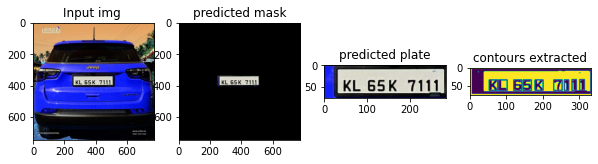

opencv+ yolo ==  KL65K7111
******************************
image path is ==  p10.jpg
-----------------------------------
Processing 1 images
image                    shape: (1067, 1600, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1600.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
hi
dict_keys(['rois', 'class_ids', 'scores', 'masks'])
(1, 4)
hii
1
[[ 584  399  794 1084]]
[0.97274774]
[1]
input image shape is ==  (1067, 1600, 3)
predicted mask shape is ==  (210, 685, 3)
no of characters found are =  8


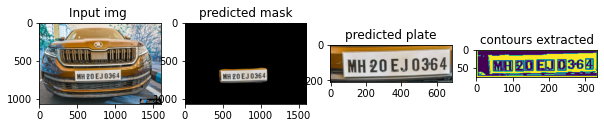

opencv+ yolo ==  MH20EJ04
******************************
image path is ==  p11.jpg
-----------------------------------
Processing 1 images
image                    shape: (1223, 2572, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 2572.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
hi
dict_keys(['rois', 'class_ids', 'scores', 'masks'])
(0, 4)
hii
image path is ==  p12.jpg
-----------------------------------
Processing 1 images
image                    shape: (493, 740, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4

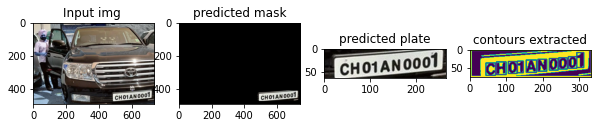

opencv+ yolo ==  CH01AN0001
******************************
image path is ==  p13.jpg
-----------------------------------
Processing 1 images
image                    shape: (768, 1024, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
hi
dict_keys(['rois', 'class_ids', 'scores', 'masks'])
(1, 4)
hii
1
[[339 434 496 776]]
[0.9803782]
[1]
input image shape is ==  (768, 1024, 3)
predicted mask shape is ==  (157, 342, 3)
no of characters found are =  9


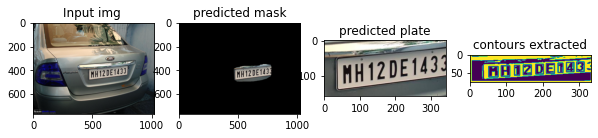

opencv+ yolo ==  HH12DE143
******************************
image path is ==  p15.jpg
-----------------------------------
Processing 1 images
image                    shape: (480, 640, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
hi
dict_keys(['rois', 'class_ids', 'scores', 'masks'])
(1, 4)
hii
1
[[329 233 377 390]]
[0.97230643]
[1]
input image shape is ==  (480, 640, 3)
predicted mask shape is ==  (48, 157, 3)
no of characters found are =  9


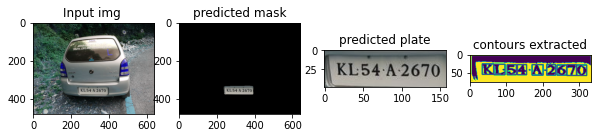

opencv+ yolo ==  IL54A2670
******************************
image path is ==  p16.png
-----------------------------------
Processing 1 images
image                    shape: (340, 766, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
hi
dict_keys(['rois', 'class_ids', 'scores', 'masks'])
(1, 4)
hii
1
[[195 337 261 613]]
[0.9657866]
[1]
input image shape is ==  (340, 766, 3)
predicted mask shape is ==  (66, 276, 3)
no of characters found are =  10


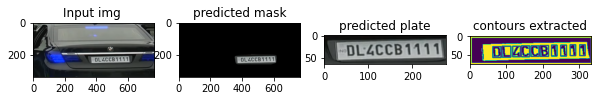

opencv+ yolo ==  0LICCB1111
******************************
image path is ==  p17.jpg
-----------------------------------
Processing 1 images
image                    shape: (269, 360, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
hi
dict_keys(['rois', 'class_ids', 'scores', 'masks'])
(1, 4)
hii
1
[[154  67 198 231]]
[0.9813332]
[1]
input image shape is ==  (269, 360, 3)
predicted mask shape is ==  (44, 164, 3)
no of characters found are =  10


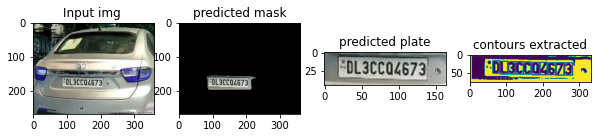

opencv+ yolo ==  DL3CC04673
******************************
image path is ==  p19.jpg
-----------------------------------
Processing 1 images
image                    shape: (480, 640, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
hi
dict_keys(['rois', 'class_ids', 'scores', 'masks'])
(1, 4)
hii
1
[[348 190 424 419]]
[0.978114]
[1]
input image shape is ==  (480, 640, 3)
predicted mask shape is ==  (76, 229, 3)
no of characters found are =  9


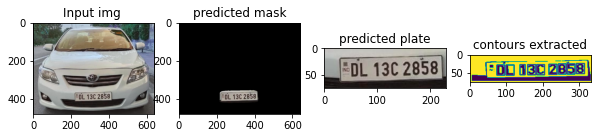

opencv+ yolo ==  0L13C2858
******************************
image path is ==  p18.jpg
-----------------------------------
Processing 1 images
image                    shape: (480, 640, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
hi
dict_keys(['rois', 'class_ids', 'scores', 'masks'])
(1, 4)
hii
1
[[144  74 292 531]]
[0.95786184]
[1]
input image shape is ==  (480, 640, 3)
predicted mask shape is ==  (148, 457, 3)
no of characters found are =  9


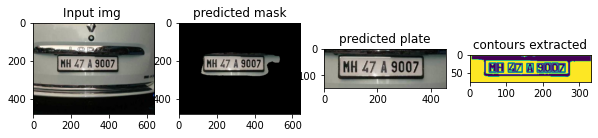

opencv+ yolo ==  8H47A9007
******************************


In [28]:
from google.colab.patches import cv2_imshow
src='../test_images'


for idx,i in enumerate(os.listdir(src)):

  print('image path is == ',i)
  input_image=cv2.imread(src+'/'+i)
  predict_pipeline(input_image,model_)  

### I am getting good results using Mask RCNN 
### Plate Extraction is near perfect.
### Character Segmentation is also good.
### Some chracter due to varying segmented pixel quality, are classified incorrectly, for ex d is predicted as o.
### Overall apart from one or two errors, the the license plate can be read.